In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

In [ ]:
# Specify the folder path
folder_path = '/content/drive/MyDrive/NLP_modifiedData/NLP_Datasets'

In [ ]:
# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop over each file and read it into a DataFrame, then append to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

In [ ]:
print(f"Number of DataFrames loaded: {len(dataframes)}")

Number of DataFrames loaded: 19


In [ ]:
for i, df in enumerate(dataframes, 1):
    print(f"DataFrame {i}: {df.shape[0]} rows, {df.shape[1]} columns")

DataFrame 1: 398 rows, 18 columns
DataFrame 2: 193 rows, 18 columns
DataFrame 3: 223 rows, 18 columns
DataFrame 4: 239 rows, 18 columns
DataFrame 5: 791 rows, 18 columns
DataFrame 6: 198 rows, 18 columns
DataFrame 7: 690 rows, 18 columns
DataFrame 8: 609 rows, 18 columns
DataFrame 9: 344 rows, 18 columns
DataFrame 10: 47 rows, 18 columns
DataFrame 11: 274 rows, 18 columns
DataFrame 12: 314 rows, 18 columns
DataFrame 13: 46 rows, 18 columns
DataFrame 14: 564 rows, 18 columns
DataFrame 15: 479 rows, 18 columns
DataFrame 16: 292 rows, 18 columns
DataFrame 17: 344 rows, 18 columns
DataFrame 18: 179 rows, 18 columns
DataFrame 19: 154 rows, 18 columns


In [ ]:
# Concatenate all DataFrames
main_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
main_df.shape

(6378, 18)

In [ ]:
main_df.head()

,helpfulVotes,id,lang,locationId,ownerResponse,photos,placeInfo,publishedDate,publishedPlatform,rating,roomTip,subratings,text,title,travelDate,tripType,url,user
0,0,976855792,en,447407,NaN,[],"{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-27,MOBILE,5,NaN,[],We have been fortunate to meet the head chef ...,Excellent chef and service. Very attentive.,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '22C31251ACF7FD45781977BF2FD9F49E',..."
1,0,976848001,en,447407,"{'id': '978350655', 'text': ""Dear Natashaw,\n\...",[],"{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-27,OTHER,5,NaN,[],Myself and my family had a great time at Sigir...,Great hotel and restaurant,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '500C57E358033358E19AB89A0A4ECD19',..."
2,0,976658737,en,447407,"{'id': '978350091', 'text': 'Dear Jeewa Godage...","[{'id': '770115169', 'image': 'https://media-c...","{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-25,OTHER,5,NaN,[],We had a really nice one night in sigiriya vil...,Had a fantastic weekend in the sigiriya villag...,2024-10,FRIENDS,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '64AB7003B6A561B6DB860C9C9FF9BC29',..."
3,0,976658654,en,447407,"{'id': '978349493', 'text': ""Dear Guest.\n\nWa...","[{'id': '770115172', 'image': 'https://media-c...","{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-25,MOBILE,4,NaN,[],"The rooms in this hotel are huge ,very comfy a...",Lots going on,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '23DF5EF1C6CB1BD10247293D0A824BD2',..."
4,0,974741618,en,447407,"{'id': '974892951', 'text': ""Dear Guest,\n\nWa...",[],"{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-20,OTHER,5,NaN,[],"Everything was beatiful, the hotel was amazin...",Good hotel,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '4E94A6397EE2636375FFBD6A6158AA01',..."


In [ ]:
# Get the columns of the first DataFrame as a reference
reference_columns = dataframes[0].columns

# Check if columns are the same in all DataFrames
for i, df in enumerate(dataframes, 1):
    if not df.columns.equals(reference_columns):
        print(f"DataFrame {i} has different columns.")
        print("Columns:", df.columns)
    else:
        print(f"DataFrame {i} has the same columns.")


DataFrame 1 has the same columns.
DataFrame 2 has the same columns.
DataFrame 3 has the same columns.
DataFrame 4 has the same columns.
DataFrame 5 has the same columns.
DataFrame 6 has the same columns.
DataFrame 7 has the same columns.
DataFrame 8 has the same columns.
DataFrame 9 has the same columns.
DataFrame 10 has the same columns.
DataFrame 11 has the same columns.
DataFrame 12 has the same columns.
DataFrame 13 has the same columns.
DataFrame 14 has the same columns.
DataFrame 15 has the same columns.
DataFrame 16 has the same columns.
DataFrame 17 has the same columns.
DataFrame 18 has the same columns.
DataFrame 19 has the same columns.


Data Cleaning

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.1 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and wordnet if needed
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = emoji.demojize(text)  # Replace emojis with descriptive text like :smiling_face:
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s:]', '', text)  # Remove non-alphanumeric characters except colons for emoji descriptions
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

main_df['cleaned_text'] = main_df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Describe Data

In [ ]:
num_hotels = main_df['locationId'].nunique()
print(f"Number of hotels: {num_hotels}")

Number of hotels: 215


In [ ]:
reviews_per_hotel = main_df.groupby('locationId')['id'].count()
print(reviews_per_hotel)

locationId
302888      58
304700      48
306376      50
306383      49
308529      50
            ..
25983119    49
26194654    50
26226338    58
26325123    21
28040522    47
Name: id, Length: 215, dtype: int64


In [ ]:
total_words = main_df['cleaned_text'].str.split().apply(len).sum()
print(f"Total number of words: {total_words}")

Total number of words: 307714


In [ ]:
unique_words = set(" ".join(main_df['cleaned_text']).split())
num_unique_words = len(unique_words)
print(f"Number of unique words: {num_unique_words}")

Number of unique words: 16947


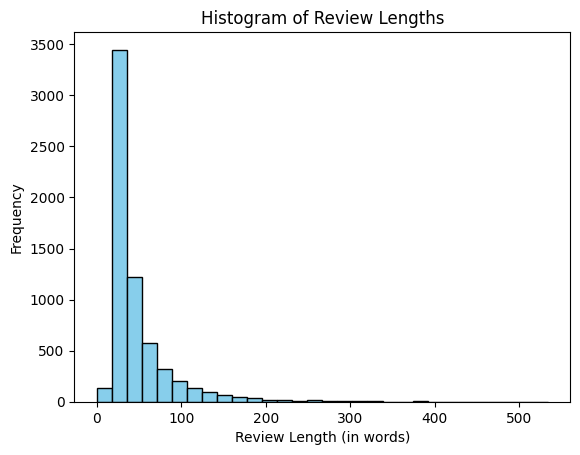

In [ ]:
import matplotlib.pyplot as plt

review_lengths = main_df['cleaned_text'].str.split().apply(len)
plt.hist(review_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths')
plt.show()

In [ ]:
import ast

# Convert placeInfo strings to dictionaries (if they are strings)
main_df['placeInfo'] = main_df['placeInfo'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# Define a function to safely extract the values from placeInfo
def extract_info(row):
    if isinstance(row, dict):  # Check if the row is a dictionary
        name = row.get('name', None)
        city = row.get('addressObj', {}).get('city', None)  # Safe access to nested city
        return pd.Series([name, city])
    else:
        return pd.Series([None, None])  # Return None if placeInfo is not a dictionary

# Apply the function to placeInfo and store the results in new columns
main_df[['hotel_name', 'city']] = main_df['placeInfo'].apply(extract_info)


In [ ]:
# Display the extracted columns with the unique ID
main_df.head()

,helpfulVotes,id,lang,locationId,ownerResponse,photos,placeInfo,publishedDate,publishedPlatform,rating,...,text,title,travelDate,tripType,url,user,cleaned_text,tokenized_text,hotel_name,city
0,0,976855792,en,447407,NaN,[],"{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-27,MOBILE,5,...,We have been fortunate to meet the head chef ...,Excellent chef and service. Very attentive.,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '22C31251ACF7FD45781977BF2FD9F49E',...",fortunate meet head chef manjula perera person...,fortunate meet head chef manjula perera person...,Sigiriya Village Hotel,Sigiriya
1,0,976848001,en,447407,"{'id': '978350655', 'text': ""Dear Natashaw,\n\...",[],"{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-27,OTHER,5,...,Myself and my family had a great time at Sigir...,Great hotel and restaurant,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '500C57E358033358E19AB89A0A4ECD19',...",family great time sigiriya village highlight u...,chef manjula perera hotel great sigiriya villa...,Sigiriya Village Hotel,Sigiriya
2,0,976658737,en,447407,"{'id': '978350091', 'text': 'Dear Jeewa Godage...","[{'id': '770115169', 'image': 'https://media-c...","{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-25,OTHER,5,...,We had a really nice one night in sigiriya vil...,Had a fantastic weekend in the sigiriya villag...,2024-10,FRIENDS,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '64AB7003B6A561B6DB860C9C9FF9BC29',...",really nice one night sigiriya village highly ...,great sigiriya village food sigiriya village r...,Sigiriya Village Hotel,Sigiriya
3,0,976658654,en,447407,"{'id': '978349493', 'text': ""Dear Guest.\n\nWa...","[{'id': '770115172', 'image': 'https://media-c...","{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-25,MOBILE,4,...,"The rooms in this hotel are huge ,very comfy a...",Lots going on,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '23DF5EF1C6CB1BD10247293D0A824BD2',...",room hotel huge comfy quiet restaurant bar are...,hotel village sri lankan food sri lankan lanka...,Sigiriya Village Hotel,Sigiriya
4,0,974741618,en,447407,"{'id': '974892951', 'text': ""Dear Guest,\n\nWa...",[],"{'id': '447407', 'name': 'Sigiriya Village Hot...",2024-10-20,OTHER,5,...,"Everything was beatiful, the hotel was amazin...",Good hotel,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g3...,"{'userId': '4E94A6397EE2636375FFBD6A6158AA01',...",everything beatiful hotel amazing food also go...,hotel sigiriya food family good everything bea...,Sigiriya Village Hotel,Sigiriya


Apply Tokenization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Initialize CountVectorizer for word-level and bigram tokenization
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Word-Level and Bigram tokenization

# Apply vectorizer to the 'cleaned_text' column and create a new column for the tokenized data
def tokenize_and_add(df, column_name):
    # Transform the text data into a list of tokens (word-level and bigrams)
    tokens = vectorizer.fit_transform(df[column_name])
    # Convert the tokenized data into a readable format (list of tokens for each document)
    tokenized_data = [' '.join(tokens) for tokens in vectorizer.inverse_transform(tokens)]
    df['tokenized_text'] = tokenized_data  # Add the new tokenized data as a separate column
    return df

# Call the function to tokenize the cleaned text and add it as a new column
main_df = tokenize_and_add(main_df, 'cleaned_text')

# Display the resulting dataframe
print(main_df)

      helpfulVotes         id lang  locationId  \
0                0  976855792   en      447407   
1                0  976848001   en      447407   
2                0  976658737   en      447407   
3                0  976658654   en      447407   
4                0  974741618   en      447407   
...            ...        ...  ...         ...   
6373             0  966886955   en    25147883   
6374             0  952400230   en    25147883   
6375             0  942583861   en    25147883   
6376             0  940971814   en    25147883   
6377             0  939895972   en    25147883   

                                          ownerResponse  \
0                                                   NaN   
1     {'id': '978350655', 'text': "Dear Natashaw,\n\...   
2     {'id': '978350091', 'text': 'Dear Jeewa Godage...   
3     {'id': '978349493', 'text': "Dear Guest.\n\nWa...   
4     {'id': '974892951', 'text': "Dear Guest,\n\nWa...   
...                                          

EDA

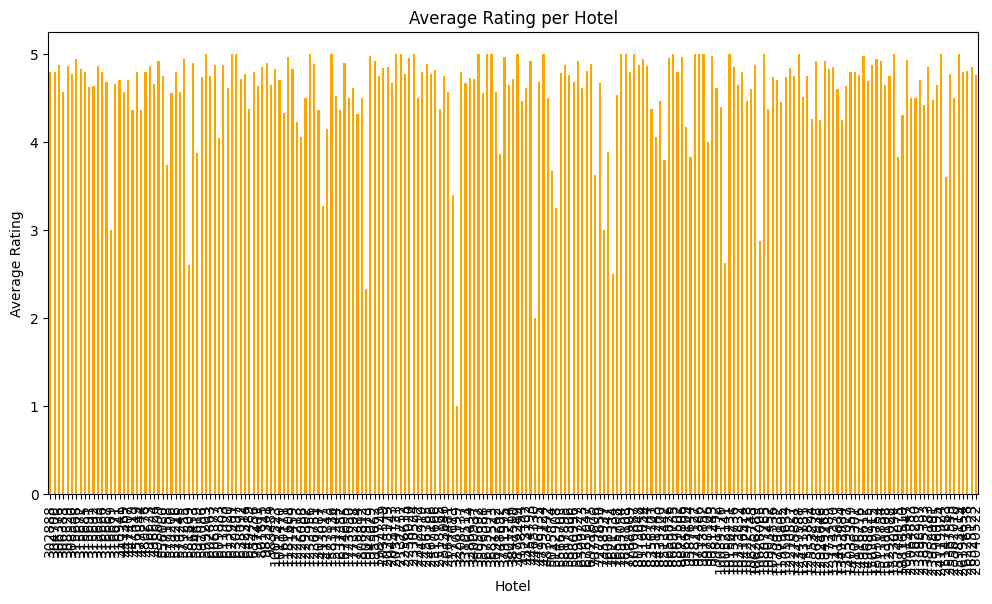

In [ ]:
avg_rating_per_hotel = main_df.groupby('locationId')['rating'].mean()
avg_rating_per_hotel.plot(kind='bar', figsize=(12, 6), color='orange')
plt.xlabel('Hotel')
plt.ylabel('Average Rating')
plt.title('Average Rating per Hotel')
plt.show()


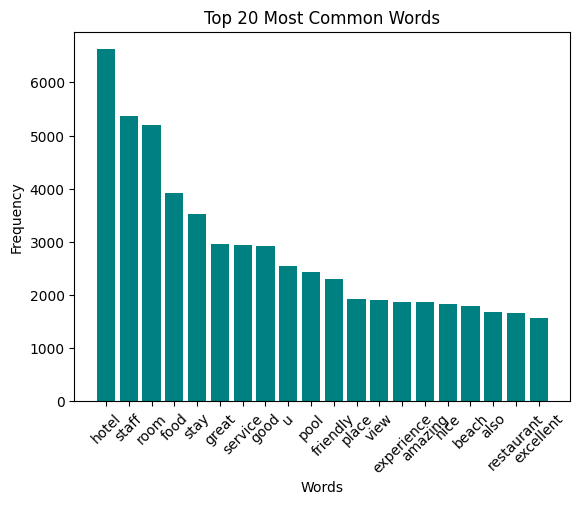

In [ ]:
from collections import Counter

word_counts = Counter(" ".join(main_df['cleaned_text']).split())
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.bar(words, counts, color='teal')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


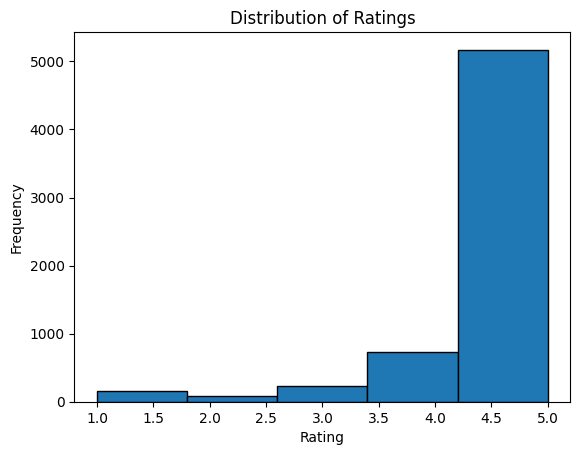

In [ ]:
main_df['rating'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


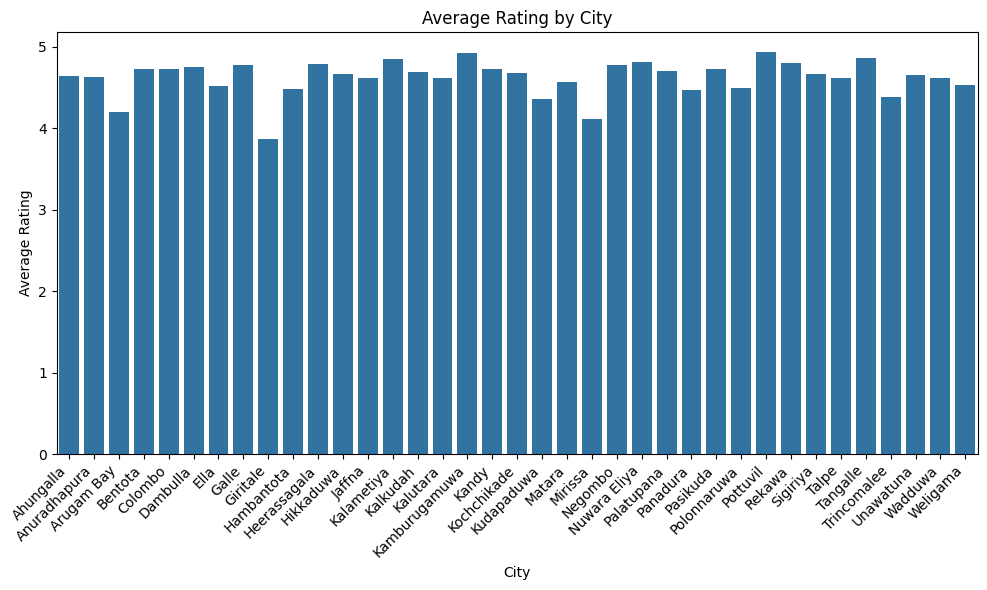

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming main_df has columns 'rating' and 'city'
# Calculate the average rating for each city
city_rating_avg = main_df.groupby('city')['rating'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='rating', data=city_rating_avg)

# Customize the plot
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by City')
plt.xticks(rotation=45, ha='right')  # Rotate city names if necessary for readability
plt.tight_layout()

# Show the plot
plt.show()


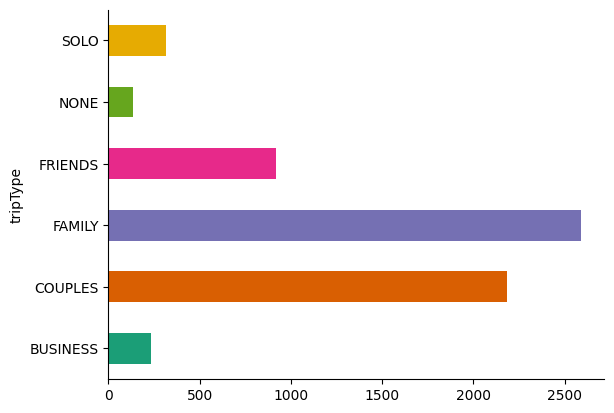

In [ ]:
main_df.groupby('tripType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

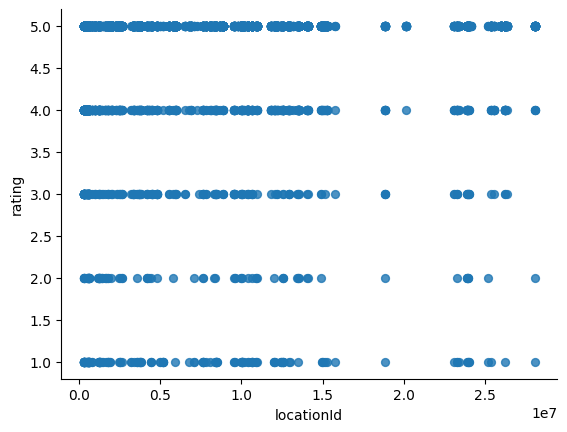

In [ ]:
from matplotlib import pyplot as plt
main_df.plot(kind='scatter', x='locationId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Task 2**: Sentiment Analysis

Vader

* Vader, TextBlob and SentiWordNet are lexicon methods.

* Vader and TextBlob uses the cleaned text to analyse and classify is the review is positive, negative or neutral.

* SentiWordNet uses the tokenized data to classify is the review is positive, negative or neutral.




In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment
def vader_sentiment(review):
    score = vader_analyzer.polarity_scores(review)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment
main_df['vader_sentiment'] = main_df['cleaned_text'].apply(vader_sentiment)

TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
def get_textblob_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

main_df['textblob_sentiment'] = main_df['cleaned_text'].apply(get_textblob_sentiment)

SentiWordNet

In [ ]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
import nltk

In [ ]:
# Download necessary NLTK data files if not already downloaded
nltk.download('stopwords')
nltk.download('sentiwordnet')

# Function to get sentiment based on SentiWordNet (using pre-tokenized data)
def get_sentiwordnet_sentiment_from_tokens(tokens):
    # Filter out stopwords and non-alphabetic words (if needed)
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

    sentiment_score = 0.0
    for token in tokens:
        # Get sentiment synsets for each token
        synsets = list(swn.senti_synsets(token))  # Get all synsets for the token
        if synsets:  # If synsets exist for the token
            # Sum the sentiment scores (positive - negative) for the synset
            sentiment_score += synsets[0].pos_score() - synsets[0].neg_score()

    # Classify sentiment based on the sentiment score
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Assuming 'tokenized_reviews' is your column containing pre-tokenized words or bigrams
main_df['sentiwordnet_sentiment'] = main_df['tokenized_text'].apply(get_sentiwordnet_sentiment_from_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


Majority Voting

* Sentiment Predictions: Each review will include sentiment predictions from three classifiers (VADER, TextBlob, and SentiWordNet).

* Apply Majority Voting: For each review, tally the sentiment labels predicted by these classifiers and select the sentiment label with the most votes as the "ground truth."

In [ ]:
from collections import Counter

In [ ]:
def majority_vote(row):
    # Collect the predictions from the 3 classifiers
    sentiments = [row['vader_sentiment'], row['textblob_sentiment'], row['sentiwordnet_sentiment']]

    # Use Counter to count the occurrences of each sentiment
    sentiment_count = Counter(sentiments)

    # Get the most common sentiment (majority vote)
    majority_sentiment = sentiment_count.most_common(1)[0][0]

    return majority_sentiment

# Apply majority vote to each row and create a new column for ground truth
main_df['ground_truth_sentiment'] = main_df.apply(majority_vote, axis=1)

In [ ]:
# Example to see the results
print(main_df[['vader_sentiment', 'textblob_sentiment', 'sentiwordnet_sentiment', 'ground_truth_sentiment']].head())

  vader_sentiment textblob_sentiment sentiwordnet_sentiment  \
0        positive           positive               positive   
1        positive           positive               positive   
2        positive           positive               positive   
3        positive           positive               positive   
4        positive           positive               positive   

  ground_truth_sentiment  
0               positive  
1               positive  
2               positive  
3               positive  
4               positive  


In [ ]:
main_df[['cleaned_text', 'vader_sentiment', 'textblob_sentiment', 'sentiwordnet_sentiment', 'ground_truth_sentiment']].where(main_df['vader_sentiment'] == 'neutral').dropna()

,cleaned_text,vader_sentiment,textblob_sentiment,sentiwordnet_sentiment,ground_truth_sentiment
223,night stay found frog lizard countless mosquit...,neutral,negative,positive,neutral
1162,incredible experience highlight sri lankan tri...,neutral,positive,positive,positive
1202,disappointed stay looking forward staying yala...,neutral,negative,positive,neutral
2252,even though check time pm got room pm getting ...,neutral,neutral,positive,neutral
2274,bald headed man beard think one manager hotel ...,neutral,positive,positive,positive
3832,arrival checked room wasnt clean hair bathroom...,neutral,positive,positive,positive
3906,hotel try fails many way keep rating based vie...,neutral,negative,positive,neutral
4129,load insect room change room even nd room inse...,neutral,neutral,positive,neutral
4808,hotel room expected small cramped people hotel...,neutral,positive,positive,positive
4922,nice hotel highway room nicely furnished adequ...,neutral,positive,positive,positive


### **Task 3**: Feature Extraction

**Sparse:**
* Bag of Words (BoW)
* TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Sample dataset of cleaned reviews
texts = main_df['cleaned_text'].tolist()

In [ ]:
# Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(texts)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

In [ ]:
print("Shape of BoW Matrix:", bow_matrix.shape)
print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

Shape of BoW Matrix: (6378, 16556)
Shape of TF-IDF Matrix: (6378, 16556)


**Dense:**


*   Word2Vec
*   GloVe




In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize the reviews if needed
tokens = main_df['tokenized_text'].tolist()

# Word2Vec (Train your own Word2Vec model)
word2vec_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)
word2vec_matrix = []

# Get the dense vector representation by averaging word vectors in each document
for tokenized_review in tokens:
    # Check if the review has any words in the model's vocabulary
    review_vectors = [word2vec_model.wv[word] for word in tokenized_review if word in word2vec_model.wv]

    # If the review has words in the vocabulary, calculate the average vector
    if review_vectors:
        review_vector = np.mean(review_vectors, axis=0)
    # If the review has no words in the vocabulary, use a zero vector of the correct size
    else:
        review_vector = np.zeros(word2vec_model.vector_size)

    word2vec_matrix.append(review_vector)

word2vec_matrix = np.array(word2vec_matrix)

In [ ]:
import numpy as np
import pandas as pd

# Load GloVe embeddings (ensure you have downloaded the glove.6B.100d.txt file or any other appropriate GloVe file)
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load the GloVe embeddings (100-dimensional vectors from 'glove.6B.100d.txt')
glove_file = '/content/drive/MyDrive/glove.6B/glove.6B.100d.txt'
embeddings_index = load_glove_embeddings(glove_file)

# Example cleaned text (from your DataFrame)
texts = main_df['tokenized_text'].tolist()  # Use your tokenized text here (after cleaning)

# Initialize a matrix to store the GloVe vectors for each review
glove_matrix = []

# Define a function to get the GloVe embedding for a review by averaging the word vectors
def get_glove_vector(review, embeddings_index, embedding_dim=100):
    # Initialize an empty list to collect the word vectors
    review_vector = []

    # Iterate over the words in the review
    for word in review.split():  # Assuming review is space-separated
        # If the word is in the GloVe vocabulary, append its vector
        if word in embeddings_index:
            review_vector.append(embeddings_index[word])

    # If the review has no words present in GloVe vocabulary, return a zero vector
    if len(review_vector) == 0:
        return np.zeros(embedding_dim)

    # Average the word vectors for the review
    return np.mean(review_vector, axis=0)

# Convert all reviews to GloVe embeddings
for review in texts:
    glove_matrix.append(get_glove_vector(review, embeddings_index))

# Convert the list of vectors to a numpy array
glove_matrix = np.array(glove_matrix)

# The shape of the glove_matrix will be (n_samples, embedding_dim)



In [ ]:
# !pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296187 sha256=24d21fe9d6588961f4e237ebe64e03db038b0b882e53260fd0a0ccc1e3e94038
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
# import fasttext

# # Load the pre-trained FastText model (300-dimensional vectors)
# model = fasttext.load_model('cc.en.300.bin')  # Path to the pre-trained FastText model


# # Here's how to generate the FastText vectors for each tokenized review

# def get_review_vector(tokenized_review):
#     # Get the word vector for each token in the review
#     word_vectors = [model.get_word_vector(word) for word in tokenized_review]

#     # If the review has no words, return a zero vector (optional handling for empty reviews)
#     if not word_vectors:
#         return np.zeros(model.get_dimension())  # 300-dimensional vector of zeros

#     # Average the word vectors to get a single vector for the entire review
#     review_vector = np.mean(word_vectors, axis=0)
#     return review_vector

# # Apply the function to the tokenized reviews column
# df['fasttext_vectors'] = main_df['tokenized_text'].apply(get_review_vector)

# # Convert the list of vectors to a numpy array (or list) if needed
# fasttext_matrix = np.array(df['fasttext_vectors'].tolist())

ValueError: cc.en.300.bin cannot be opened for loading!

In [ ]:
# Check shape
print("Shape of Word2Vec Matrix:", word2vec_matrix.shape)
print("Shape of GloVe matrix:", glove_matrix.shape)

Shape of Word2Vec Matrix: (6378, 100)
Shape of GloVe matrix: (6378, 100)
